In [24]:
# Importing all necessarry libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules


In [25]:
# Importin DataSet according to need
# df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv')
# df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:100,]
df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Chevrolet,Impala,LTZ,Sedan,automatic,2g1165s30f9103921,ca,19.000000,14538.0,silver,black,enterprise vehicle exchange / tra / rental / t...,24300.0,7200.0,Tue,2015-07-07 09:30:00
1,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.000000,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue,2015-02-03 04:30:00
2,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d31e9134662,ca,30.672365,33450.0,black,black,avis rac/san leandro,20100.0,14700.0,Tue,2014-12-16 12:00:00
3,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff7f1002327,ca,49.000000,5826.0,gray,black,audi north scottsdale,24000.0,23750.0,Thu,2014-12-18 12:30:00
4,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c57ed169262,ca,38.000000,10736.0,black,black,the hertz corporation,67000.0,65000.0,Tue,2015-01-06 12:30:00


In [26]:
# selecting  4 column from df 
x = df [['condition','odometer','mmr','sellingprice']]

In [27]:
x.head()

,condition,odometer,mmr,sellingprice
0,19.000000,14538.0,24300.0,7200.0
1,29.000000,25969.0,34200.0,30000.0
2,30.672365,33450.0,20100.0,14700.0
3,49.000000,5826.0,24000.0,23750.0
4,38.000000,10736.0,67000.0,65000.0


In [28]:
# Converting condition column to int bacause it is in float 
# then converting to str 

x.loc[:, 'condition'] = x['condition'].astype(int)
x.loc[:, 'condition'] = x['condition'].astype(str)

C:\Users\AjayPatil\AppData\Local\Temp\ipykernel_16532\2920542173.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['19.0' '29.0' '30.0' '49.0' '38.0' '30.0' '42.0' '48.0' '30.0' '42.0'
 '42.0' '42.0' '5.0' '38.0' '44.0' '2.0' '45.0' '5.0' '38.0' '45.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  x.loc[:, 'condition'] = x['condition'].astype(str)


In [29]:
# converting odometer, mmr, and sellingprice to the float

x.loc[:,'odometer'] = x['odometer'].astype(float)
x.loc[:,'mmr'] = x['mmr'].astype(float)
x.loc[:,'sellingprice'] = x['mmr'].astype(float)

In [30]:
# using pd.cut to cut down the data into 3  bins and giving the label to them

x.loc[:,'odometer'] = pd.cut(x['odometer'], bins= 3, labels=['low','medium','high'])
x.loc[:,'mmr'] = pd.cut(x['mmr'], bins= 3, labels=['low','medium','high'])
x.loc[:,'sellingprice'] = pd.cut(x['sellingprice'], bins= 3, labels=['low','medium','high'])

C:\Users\AjayPatil\AppData\Local\Temp\ipykernel_16532\617215281.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['medium', 'high', 'high', 'low', 'low', ..., 'medium', 'low', 'low', 'medium', 'low']
Length: 20
Categories (3, object): ['low' < 'medium' < 'high']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  x.loc[:,'odometer'] = pd.cut(x['odometer'], bins= 3, labels=['low','medium','high'])
C:\Users\AjayPatil\AppData\Local\Temp\ipykernel_16532\617215281.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['low', 'medium', 'low', 'low', 'high', ..., 'low', 'high', 'medium', 'high', 'medium']
Length: 20
Categories (3, object): ['low' < 'medium' < 'high']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  x.loc[:,'mmr'] = pd.cut(x['mmr'], bins= 3, labels=['lo

In [31]:
x.head()

,condition,odometer,mmr,sellingprice
0,19.0,medium,low,low
1,29.0,high,medium,medium
2,30.0,high,low,low
3,49.0,low,low,low
4,38.0,low,high,high


In [32]:
# converting  the categorial data into  the  dummy varible in this case (true, false)

one_hot = pd.get_dummies(x)

In [33]:
one_hot.head()

,condition_19.0,condition_2.0,condition_29.0,condition_30.0,condition_38.0,condition_42.0,condition_44.0,condition_45.0,condition_48.0,condition_49.0,condition_5.0,odometer_low,odometer_medium,odometer_high,mmr_low,mmr_medium,mmr_high,sellingprice_low,sellingprice_medium,sellingprice_high
0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False
4,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True


In [34]:
# appling apriori to the data with minimun support of 0.1

frequent_itemsets = apriori(one_hot, min_support=0.1, use_colnames=True)

In [35]:
# printing itemsets which having support greater than 0.1

print(type(frequent_itemsets))
frequent_itemsets.head()

<class 'pandas.core.frame.DataFrame'>


,support,itemsets
0,0.15,(condition_30.0)
1,0.15,(condition_38.0)
2,0.20,(condition_42.0)
3,0.10,(condition_45.0)
4,0.10,(condition_5.0)


In [36]:
# Genereating association rules on the frequentitemsets with metric of confidence with value 0.5

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

In [37]:
print(type(rules))
rules.head()


<class 'pandas.core.frame.DataFrame'>


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(condition_30.0),(odometer_low),0.15,0.50,0.1,0.666667,1.333333,0.0250,1.50,0.294118
1,(condition_30.0),(mmr_low),0.15,0.45,0.1,0.666667,1.481481,0.0325,1.65,0.382353
2,(condition_30.0),(sellingprice_low),0.15,0.45,0.1,0.666667,1.481481,0.0325,1.65,0.382353
3,(condition_38.0),(odometer_low),0.15,0.50,0.1,0.666667,1.333333,0.0250,1.50,0.294118
4,(condition_38.0),(mmr_high),0.15,0.25,0.1,0.666667,2.666667,0.0625,2.25,0.735294


In [38]:
# sorting the rules with confidence descending
rules.sort_values(by='confidence',ascending=False, inplace=True)

In [39]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
40,"(odometer_low, mmr_high)",(sellingprice_high),0.20,0.25,0.20,1.0,4.000000,0.1500,inf,0.937500
37,"(odometer_low, mmr_medium)",(sellingprice_medium),0.15,0.30,0.15,1.0,3.333333,0.1050,inf,0.823529
33,"(sellingprice_low, odometer_low)",(mmr_low),0.15,0.45,0.15,1.0,2.222222,0.0825,inf,0.647059
28,"(condition_38.0, sellingprice_high)",(mmr_high),0.10,0.25,0.10,1.0,4.000000,0.0750,inf,0.833333
27,"(condition_38.0, mmr_high)",(sellingprice_high),0.10,0.25,0.10,1.0,4.000000,0.0750,inf,0.833333


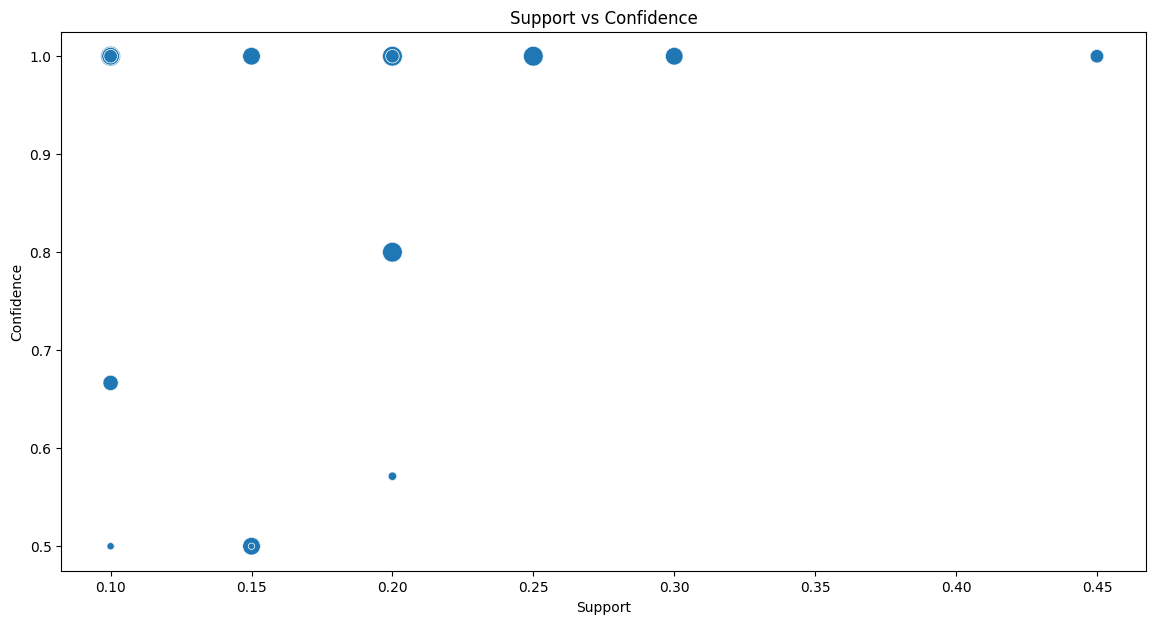

In [40]:
# plotting graph of support VS Confidence 

plt.figure(figsize=(14,7))
sns.scatterplot(data= rules, x='support', y='confidence', size ='lift',sizes=(20, 200), legend=False)

plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

plt.savefig('./Graph/1.Support vs Confidence.png')
plt.show()

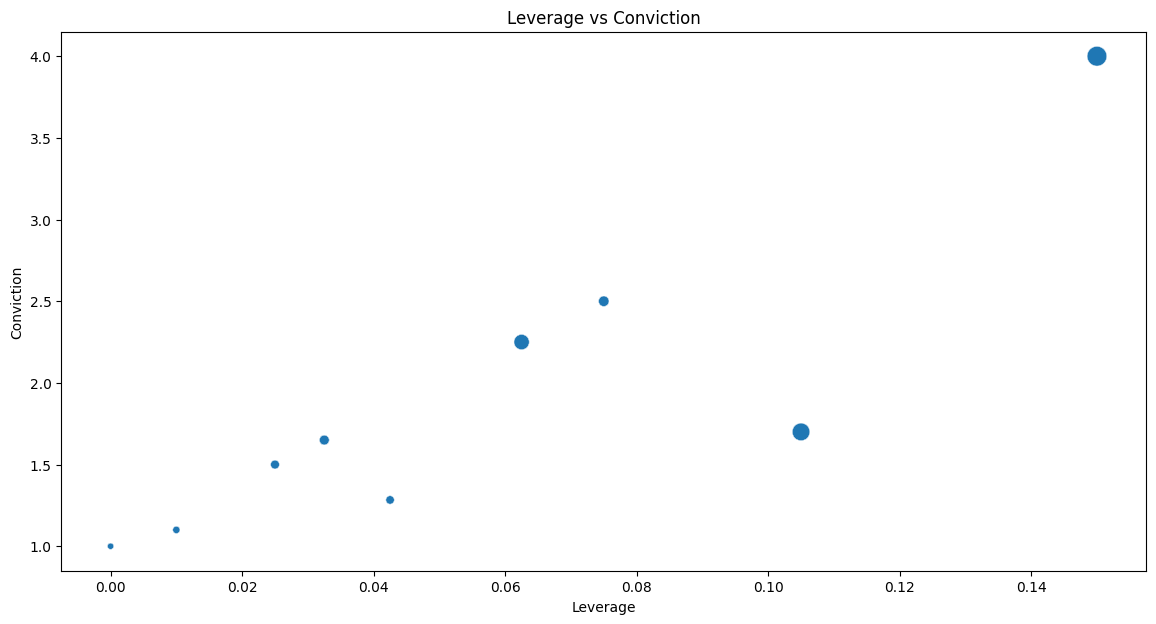

In [41]:
# plotting graph of Leverage vs Conviction
plt.figure(figsize=(14,7))
sns.scatterplot(x='leverage', y='conviction', size='lift', data=rules, legend=False, sizes=(20, 200))

plt.title('Leverage vs Conviction')
plt.xlabel('Leverage')
plt.ylabel('Conviction')

plt.savefig('./Graph/1.Leverage vs Conviction.png')
plt.show()